In [1]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

import pandas as pd

In [2]:
data1 = pd.read_csv('breast-cancer-wisconsin.csv', header = None)
data1

,0,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [3]:
#Cambio los valores de 2 a 0 y de 4 a 1
data1.iloc[:,9].replace(2, 0,inplace=True)
data1.iloc[:,9].replace(4, 1,inplace=True)
data1

,0,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [4]:
data1 = data1[~data1[5].isin(['?'])]
data1 = data1.astype(float)

In [5]:
data1

,0,1,2,3,4,5,6,7,8,9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,1.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,1.0


In [6]:
data = np.array(data1)
x = data[0:500, 0:9]
y = data[0:500, 9]
m =y.size
print(x.shape)
print(y.shape)

(500, 9)
(500,)


In [7]:
def calcularSigmoide(z):
    # Calcula la sigmoide de z.

    return 1.0 / (1.0 + np.exp(-z))

In [8]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = x.shape
# Agraga el termino de intercepción a A
x = np.concatenate([np.ones((m, 1)), x], axis=1)

print(x[:])

[[ 1.  5.  1. ...  3.  1.  1.]
 [ 1.  5.  4. ...  3.  2.  1.]
 [ 1.  3.  1. ...  3.  1.  1.]
 ...
 [ 1.  5.  1. ...  1.  1.  1.]
 [ 1.  3.  1. ...  2.  1.  1.]
 [ 1.  6.  6. ...  8. 10.  2.]]


In [9]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = calcularSigmoide(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [10]:
theta_ceros = np.zeros(n+1)
cost = calcularCosto(theta_ceros, x, y)
print("Costo Inicial :", cost)

Costo Inicial : 0.6931471805599453


In [11]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [12]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 850000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = descensoGradiente(theta, x, y, alpha, num_iters)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

theta calculado por el descenso por el gradiente: [-4.29291822  0.15815348  0.22315873  0.22362967  0.10887721 -0.0957874
  0.34629325 -0.05689189  0.19084719  0.11164806]


Valor del costo inicial :  0.6931471805599453
Valor del costo final :  0.1367859289680137


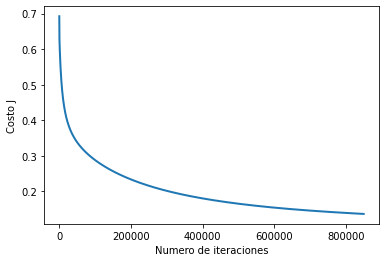

In [14]:
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
Costo = J_history[-1]
print("Valor del costo inicial : ",cost)
print("Valor del costo final : ",Costo)

In [15]:
# verificar si el tumor es benigno(0) o maligno(1)
# datos no utilizados de la tabla para la prediccion
# segun la tabla con estos datos un tumor es maligno
X_array = [1, 5.0,	10.0,	10.0,	3.0,	7.0,	3.0,	8.0,	10.0,	2.0]
prueba = calcularSigmoide(np.dot(X_array, theta))
print(f"Basandonos en los analisis podemos deducir que el tumor es (usando el descenso por el gradiente):{prueba}") #correcto

# segun la tabla con estos datos un tumor es benigno
X_array = [1, 2.0,	1.0,	1.0,	1.0,	2.0,	1.0,	1.0,	1.0,	1.0]
prueba2 = calcularSigmoide(np.dot(X_array, theta))
print(f"Basandonos en los analisis podemos deducir que el tumor es (usando el descenso por el gradiente):{prueba2}") #correcto

Basandonos en los analisis podemos deducir que el tumor es (usando el descenso por el gradiente):0.9656886604109328
Basandonos en los analisis podemos deducir que el tumor es (usando el descenso por el gradiente):0.046502804868596016
